In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [2]:
policy = random_policy()
episode = run_episode(policy)

In [3]:
for i, state in enumerate(episode.visited[:-1]):
    action = policy[state]
    next_state = episode.visited[i+1]
    print(action.abx == next_state.abx and action.vaso == next_state.vaso and action.vent == next_state.vent)
    

True
True
True
True
True
True
True
True
True
True


In [4]:
state = STATES[7]# random_initial_state()
state

State(hr=-1, bp=-1, o2=-1, glu=-2, diabetic=True, abx=False, vaso=False, vent=False)

In [5]:
action = ACTIONS[len(ACTIONS) - 1]
action

Action(abx=False, vaso=False, vent=False)

In [6]:
fluctuations = [state_to_index[get_next_state(TRUE_ENV_PARAMS, state, action)] for _ in range(100)]
fluctuations

[23,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 503,
 7,
 23,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 87,
 487,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 7,
 7,
 7,
 7,
 23,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 167,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 7,
 7,
 7,
 7,
 23,
 87,
 7,
 7,
 23,
 7,
 7,
 87,
 7,
 7,
 7,
 87,
 7,
 7,
 7,
 103,
 7,
 7,
 7,
 7,
 23,
 7,
 7,
 247,
 7,
 487,
 7,
 7,
 7,
 7,
 7,
 23,
 247,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [7]:
policy = random_policy()

In [8]:
episode = run_episode(policy)

In [9]:
episode.visited

[State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=-1, bp=0, o2=-1, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=-1, bp=1, o2=0, glu=0, diabetic=False, abx=False, vaso=True, vent=True),
 State(hr=-1, bp=1, o2=0, glu=0, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=-1, bp=1, o2=0, glu=0, diabetic=False, abx=False, vaso=True, vent=True)]

In [10]:
episode.rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
dqn_training = train_dqn(true_env, 100_000, "Test")
dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")

In [13]:
# ppo_training = train_ppo(true_env, 100_000, "Test")
ppo_training = Training.load("data/trainings/PPO-Test_object.pkl")

Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


In [16]:
# # to test whether one model has a unique policy

# import hashlib

# def hash_policy(policy):
#     policy_str = ''.join(map(str, policy))
#     return hashlib.md5(policy_str.encode()).hexdigest()

# # Hash the policies
# hashed_policies = [hash_policy(get_pol(training)) for _ in range(100)]

# # Find differences
# unique_hashes = set(hashed_policies)
# print(f"Number of unique policies: {len(unique_hashes)}")


# # output: Number of unique policies: 1

In [10]:
n_states * n_actions * n_states

16588800

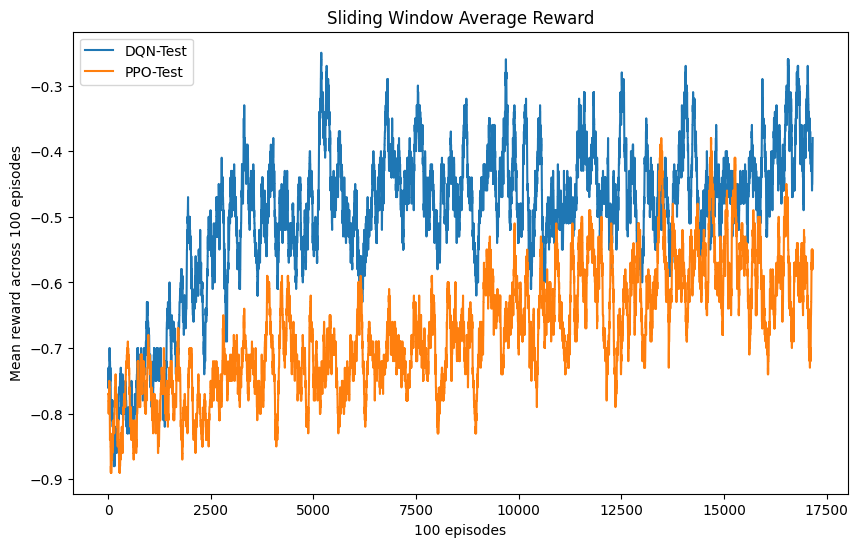

In [14]:
plot_rewards([dqn_training, ppo_training], len(dqn_training.episodes), )

In [16]:
dqn_training.evaluate_policy(10000)


-0.3852

In [6]:
dqn_training.get_policy()[State(hr=1, bp=0, o2=0, glu=0, diabetic=False, abx=0, vaso=0, vent=0)]

Action(abx=True, vaso=False, vent=True)

In [ ]:
# function sensible_policy(state)
#     treatment = Dict(:abx => false, :vent => false, :vaso => false)
    
#     # Give antibiotics if hr or bp is high
#     if state[:hr] == :high
#         treatment[:abx] = true
#     end

#     if state[:bp] == :high
#         treatment[:abx] = true
#     end

#     # Give ventilation if o2 is low
#     if state[:o2] == :low
#         treatment[:vent] = true
#     end

#     # Give vasopressors if bp is low
#     if state[:bp] == :low
#         treatment[:vaso] = true
#     end

#     return treatment
# end

In [19]:
ppo_training.evaluate_policy(10000)

-0.6231

In [20]:
# dqn_1M_training = train_dqn(true_env, 1_000_000, "Test-1M")
dqn_1M_training = Training.load("data/trainings/DQN-Test-1M_object.pkl")
# ppo_1M_training = train_ppo(true_env, 1_000_000, "Test-1M")
ppo_1M_training = Training.load("data/trainings/PPO-Test-1M_object.pkl")


Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


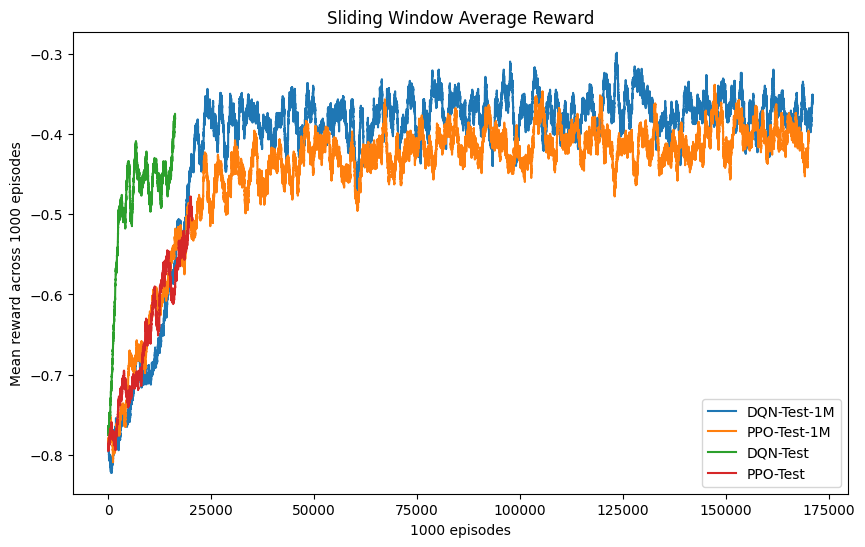

In [21]:
plot_rewards([dqn_1M_training, ppo_1M_training, dqn_training, ppo_training], len(dqn_1M_training.episodes), 1000)


In [4]:
ts_eval_f = ThompsonSampling.load("data/thompson_sampling/TS-1.pkl")
ts_eval_f2 = ThompsonSampling.load("data/thompson_sampling/TS-fac_2-10.pkl")
ts_eval = ThompsonSampling.load("data/thompson_sampling/TS-100.pkl")


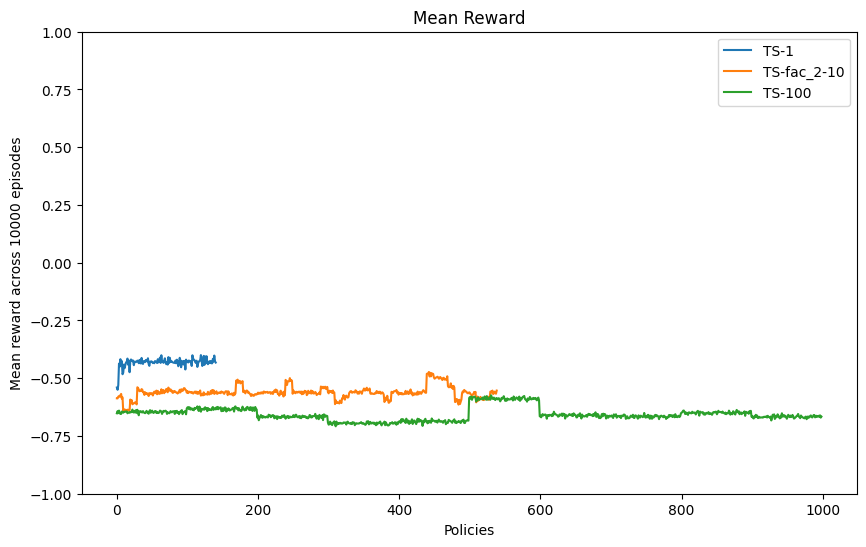

In [4]:
plot_mean_rewards([ts_eval_f, ts_eval_f2, ts_eval], 1000, 10000)

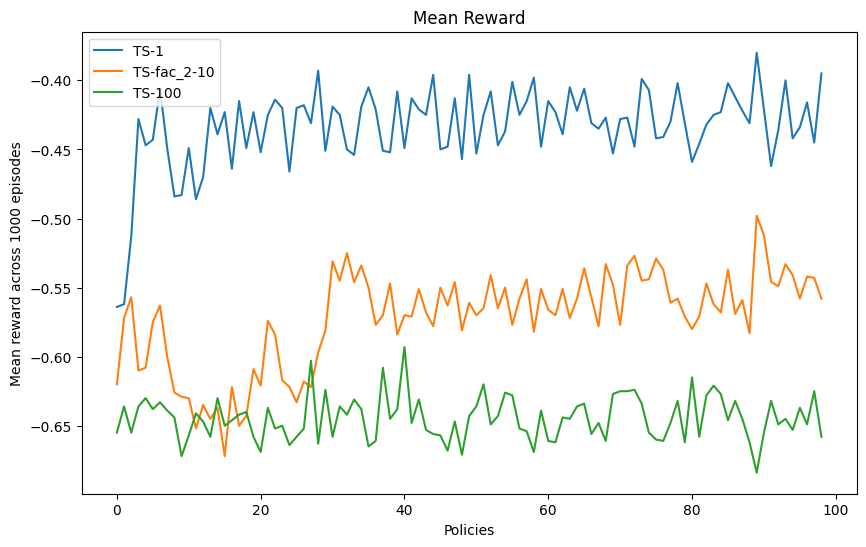

In [5]:
plot_mean_rewards([ts_eval_f, ts_eval_f2, ts_eval], 100, 1000)


In [28]:
rewards = []
policies = {}
state_counts = {}
nr_iterations = 10
nr_episodes = 10
V = np.zeros(n_states)

dirichlet = create_model(Simplification.SIMPLE)

In [29]:
for i in range(nr_iterations):
    state_counts[i] = dirichlet.get_state_counts()
    tr = dirichlet.transition_model()
    policy, V = matrix_value_iteration(V, tr)
    policies[i] = policy
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(policy)
        rewards.append(np.sum(episode.rewards))
        dirichlet.update_state_counts(episode)

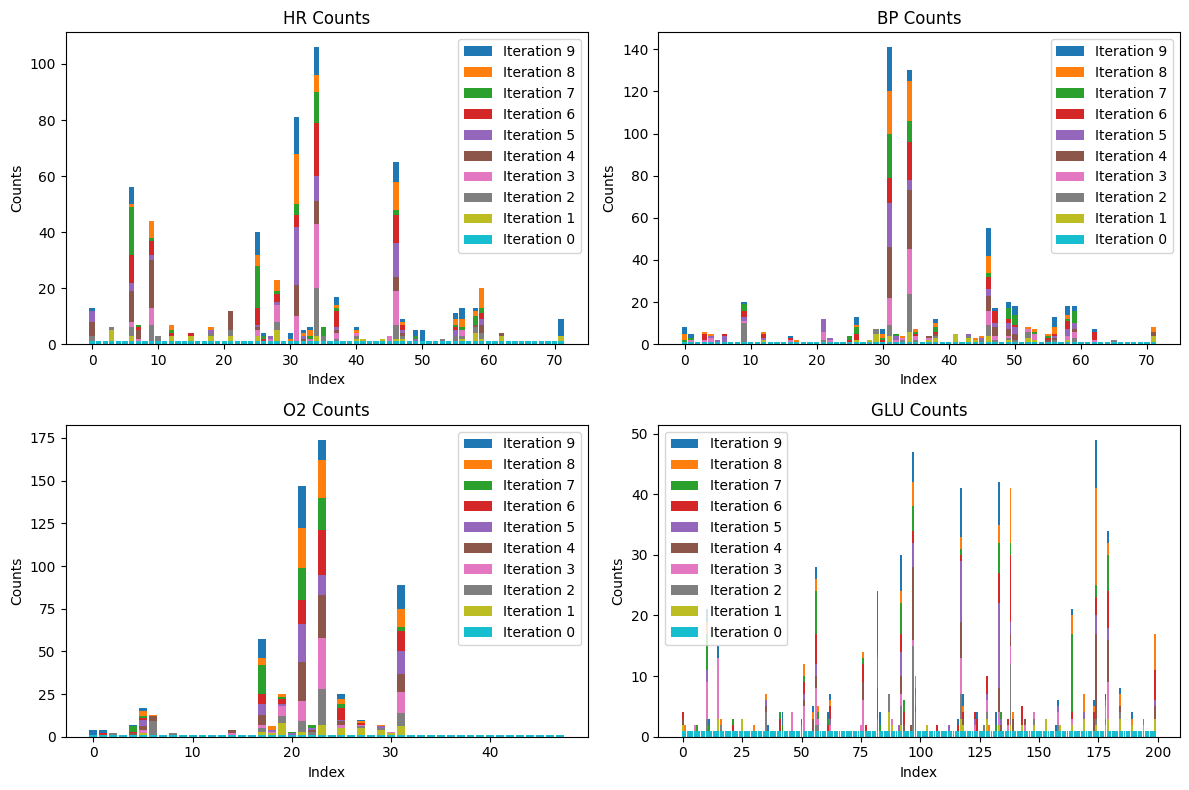

In [30]:
plt.figure(figsize=(12, 8)) 

# Create subplots in a 2x2 grid
vital_signs = ['HR', 'BP', 'O2', 'GLU']
for idx, vital_sign in enumerate(vital_signs):
    plt.subplot(2, 2, idx + 1)  # Create a subplot in a 2x2 grid
    for i in reversed(state_counts.keys()):
        counts = list(state_counts[i][idx].values())  # Extract the counts for the vital sign
        plt.bar(range(len(counts)), counts, label=f"Iteration {i}")  # Plot the counts
    
    plt.xlabel('Index')
    plt.ylabel('Counts')
    plt.title(f'{vital_sign} Counts')
    plt.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [23]:
rewards = []
policies = {}
state_counts = {}
nr_iterations = 10
nr_episodes = 10
V = np.zeros(n_states)

dirichlet = create_model(Simplification.SIMPLE)

In [24]:
for i in range(nr_iterations):
    state_counts[i] = dirichlet.get_state_counts()
    policy = random_policy()
    policies[i] = policy
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(policy)
        rewards.append(np.sum(episode.rewards))
        dirichlet.update_state_counts(episode)

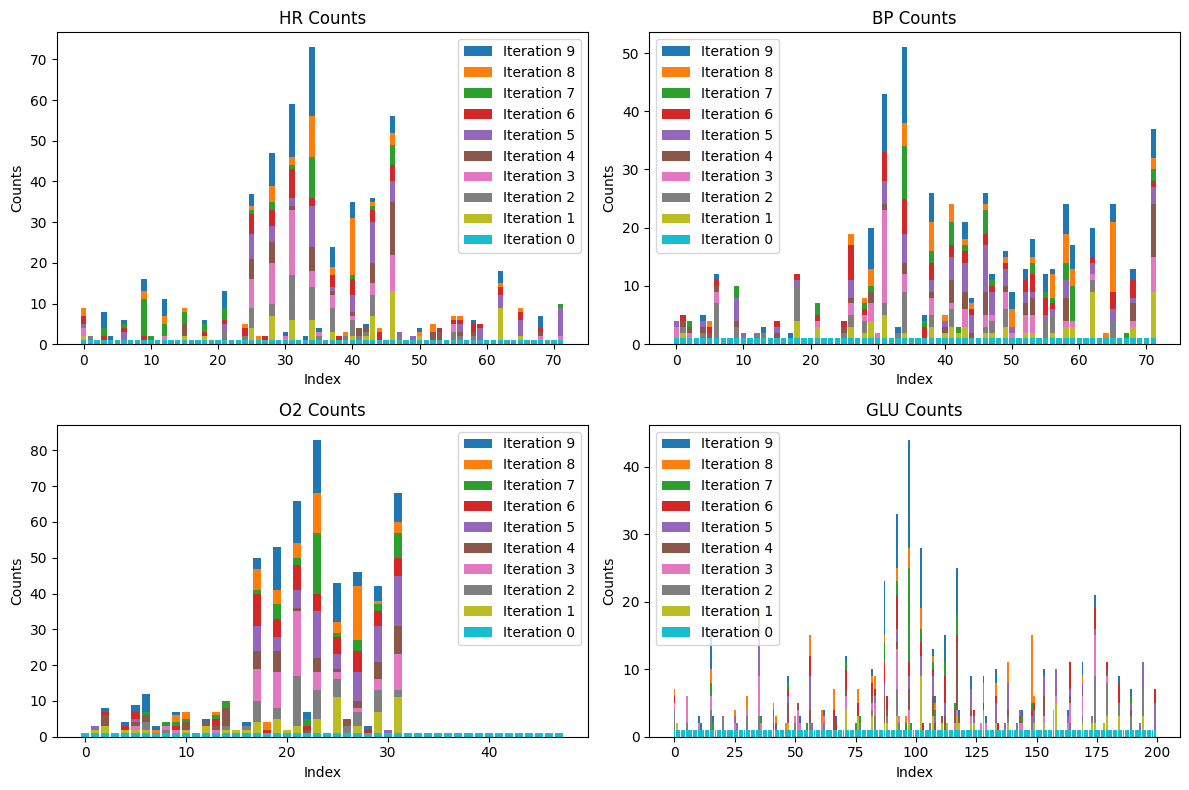

In [27]:
plt.figure(figsize=(12, 8)) 

# Create subplots in a 2x2 grid
vital_signs = ['HR', 'BP', 'O2', 'GLU']
for idx, vital_sign in enumerate(vital_signs):
    plt.subplot(2, 2, idx + 1)  # Create a subplot in a 2x2 grid
    for i in reversed(state_counts.keys()):
        counts = list(state_counts[i][idx].values())  # Extract the counts for the vital sign
        plt.bar(range(len(counts)), counts, label=f"Iteration {i}")  # Plot the counts
    
    plt.xlabel('Index')
    plt.ylabel('Counts')
    plt.title(f'{vital_sign} Counts')
    plt.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

- alle x state_counts speichern
- alle x neue policy berechnen
- für history: alle x 10 modelle samplen und optimal policy berechnen -> mean reward scatter plotten
- für thompson sampling auch alle x...
- für jedes modell 

In [31]:
ts_eval = ThompsonSampling2(rewards, state_counts, policies, "test_TS2", {})

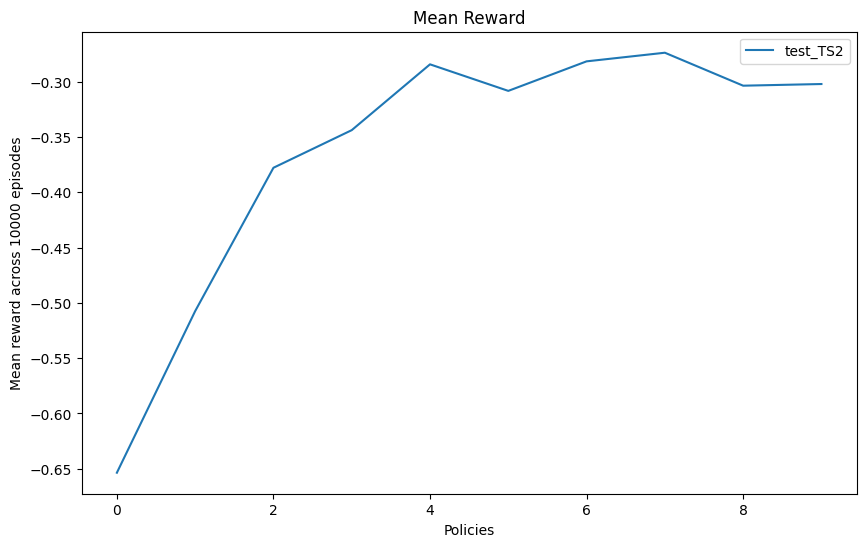

In [38]:
plot_mean_rewards_ts([ts_eval], 10, 10000)

In [3]:

histories = {
    Simplification.SIMPLE: DirHistory(create_model(Simplification.SIMPLE), {}, {}, {}, "Simple", {}),
    Simplification.MEDIUM: DirHistory(create_model(Simplification.MEDIUM), {}, {}, {}, "Medium", {}),
    Simplification.NONE: DirHistory(create_model(Simplification.NONE), {}, {}, {}, "None", {}),
}


In [4]:
histories[Simplification.SIMPLE] = DirHistory.load('data/history/Simple.pkl')
histories[Simplification.MEDIUM] = DirHistory.load('data/history/Medium.pkl')
histories[Simplification.NONE] = DirHistory.load('data/history/None.pkl')

In [15]:
histories[Simplification.NONE].mean_rewards.keys()

dict_keys([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864])

In [16]:
nr_episodes = 2**27 

In [ ]:
# history
V = np.zeros(n_states)
for i in range(2**26+1, nr_episodes+1):
    policy = random_policy()
    episode = run_episode(policy)
    for model_type in [Simplification.SIMPLE, Simplification.MEDIUM, Simplification.NONE]:
        histories[model_type].model.update_state_counts(episode)
        if (np.log2(i) % 1) == 0: # every power of 2, the counts and policy should be saved in the history
            state_counts = histories[model_type].model.get_state_counts()
            policies = []
            mean_rewards = []
            for _ in range(10):
                pol, V = matrix_value_iteration(V, histories[model_type].model.transition_model())
                policies.append(pol)
                mean_rewards.append(evaluate_policy(pol, 10000))
            histories[model_type].add_point(i, policies, mean_rewards, state_counts)
            histories[model_type].save()